In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install mne

In [3]:
!cp /content/drive/MyDrive/BCICIV_2a_gdf.zip /content

In [4]:
%%capture
!unzip /content/BCICIV_2a_gdf.zip -d data

**From the Paper: Event description**
</br>'1023':1 (Rejected trial),
</br>'1072':2 (Eye movements),
</br>'276':3 (eyes open),
</br>'277':4 (eyes closed),
</br>'32766':5 (Start of a new run),
</br>'768':6 (Start of a trial),
</br>'769':7 (class 1 - left hand),
</br>'770':8 (class 2 - right hand),
</br>'771':9 (class 3 - both feet),
</br>'772':10 (class 4 - tongue)




In [5]:
#Analyze the data
import mne

In [6]:
#Reading a gdf file as a raw object
raw=mne.io.read_raw_gdf('/content/data/A01T.gdf', eog=['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from /content/data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
#Drop eog channels since we don't need them
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Measurement date,"January 17, 2005 12:00:00 GMT"
Experimenter,Unknown
Participant,A01
Digitized points,Not available
Good channels,22 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [ ]:
#Extracting events from the annotations of the data
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [ ]:
#Display the content of events - its a two index array, containing the all events info - starting points and associated IDs. index 2 is the events id dict)
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [ ]:
#Display only the events
events[0]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]])

In [ ]:
#Display only the first twenty events
events[0][:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [ ]:
#Create events id dictionary
event_dict={
    'reject':1,
    'eyes_movement':2,
    'eyes_open':3,
    'eyes_closed':4,
    'new_run':5,
    'trial_start':6,
    'class_1':7,
    'class_2':8,
    'class_3':9,
    'class_4':10
}

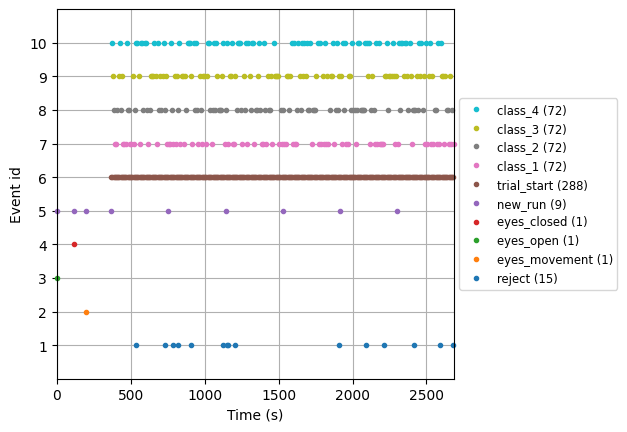

In [ ]:
#Plot the events ids and the number of events belonging to the id
fig=mne.viz.plot_events(events[0],event_id=event_dict,sfreq=raw.info['sfreq'])

In [ ]:
#Create epochs using the four classes by specifying their event ids
epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10])

Not setting metadata
288 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
#View epoch shape
epoch.get_data().shape

Loading data for 288 events and 176 original time points ...
0 bad epochs dropped


(288, 22, 176)

In [ ]:
#Define the epochs labels
labels=epoch.events[:,2]

In [ ]:
#View Labels
labels

array([10,  9,  8,  7,  7,  8,  9, 10,  8,  9,  7,  7,  7, 10,  8,  8,  7,
        7,  9,  7,  8, 10, 10,  9,  7, 10, 10,  8, 10, 10,  8,  7,  8,  9,
        9,  9, 10,  9,  7, 10,  8,  9,  8,  9, 10,  8,  9,  7,  7,  7, 10,
        8,  7,  9,  7,  9,  8, 10,  7,  9,  9,  7,  9,  8, 10, 10, 10,  9,
        7, 10,  8, 10,  8,  7,  9,  8,  7,  9,  9,  7,  9, 10, 10,  8,  7,
        8, 10,  8, 10,  9,  8,  8,  8,  9, 10,  7,  8, 10,  7,  9,  9, 10,
        7,  7,  9,  8, 10, 10, 10,  8,  7,  9,  8, 10,  7, 10,  9,  8, 10,
       10,  7,  8,  8,  9, 10,  8,  7,  7, 10,  8,  7,  9,  8,  8,  9,  7,
       10,  9,  9,  9,  9,  7,  8,  7,  8,  7,  7,  9,  9,  8,  9, 10,  7,
       10,  7,  7,  8, 10,  9,  8, 10,  9, 10,  9, 10,  8,  8, 10,  7,  8,
        8,  8,  9, 10,  7, 10,  7,  9,  7, 10,  7,  9,  7,  8,  9,  9, 10,
        7,  8, 10,  8,  9,  9,  7, 10,  8, 10,  7,  7,  9,  9,  8, 10,  8,
        8,  7,  8, 10, 10,  8,  8,  8,  8, 10, 10,  9, 10,  7,  8,  9,  8,
        7, 10,  7, 10,  7

In [ ]:
#Defining evoked - average of epochs
evoked_1=epoch['7'].average() #evoked for left hand
evoked_2=epoch['8'].average() #evoked for right hand
evoked_3=epoch['9'].average() #evoked for both feet
evoked_4=epoch['10'].average() #evoked for tongue

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


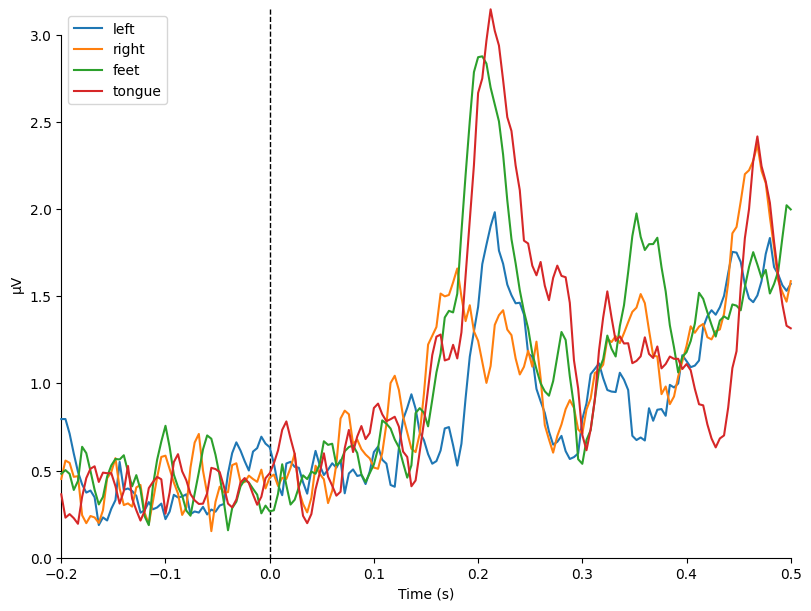

[<Figure size 800x600 with 1 Axes>]

In [ ]:
#Diplay all evoked in a comparison plot
dicts={
    'left':evoked_1,
    'right':evoked_2,
    'feet':evoked_3,
    'tongue':evoked_4
}
mne.viz.plot_compare_evokeds(dicts)

In [7]:
#Define the function to load data
def read_data(path):
  raw=mne.io.read_raw_gdf(path, eog=['EOG-left', 'EOG-central', 'EOG-right'], preload=True)
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7,on_missing='warn')
  labels=epoch.events[:,2]
  features=epoch.get_data()
  return features,labels

In [8]:
#Test the loading of data
features, labels=read_data('/content/data/A01T.gdf')

Extracting EDF parameters from /content/data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


In [9]:
#Check shape of features and labels
features.shape, labels.shape

((288, 22, 201), (288,))

In [10]:
#Accessing the data
MTO='/content/data'


In [11]:
%%capture
from glob import glob
#Importing and converting IDD files to mne
motor_data=[]
for mto in glob(MTO+'/*.gdf'):
    data=read_data(mto)
    motor_data.append(data)

In [12]:
len(motor_data)

18

In [13]:
# split the motor_data list into data and label list.
data_list, label_list = [], []
for data, label in motor_data:
  data_list.append(data)
  label_list.append(label)

In [14]:
len(data_list), len(label_list)

(18, 18)

In [15]:
#Grouping the data - Avoid grouping based on epochs or the machine learning model would have seen the unseen data, group based on participants
groups=[[i]*len(j) for i,j in enumerate(data_list)]
len(groups)

18

In [16]:
#Create 5 Fold cross-validation loop and train the model for each loop
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler

#Implementing a scaler for a 3D matrix
class StandardScaler3D(BaseEstimator, TransformerMixin):
    # batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        # Reshape to (batch*sequence, channels) and fit the scaler
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self, X):
        # Reshape to (batch*sequence, channels), transform, and reshape back
        X_scaled = self.scaler.transform(X.reshape(-1, X.shape[2]))
        return X_scaled.reshape(X.shape)


In [17]:
import numpy as np
#Reshape data because CNN expects data in a particular shape. First check shape by converting list to array
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups)
data_array=np.moveaxis(data_array,1,2)

data_array.shape, label_array.shape, group_array.shape

((5040, 201, 22), (5040,), (5040,))

In [18]:
#Splitting the train and val data for each group
accuracy=[]
for train_index,val_index in gkf.split(data_array,label_array,groups=group_array):
    train_features,train_labels=data_array[train_index],label_array[train_index]
    val_features,val_labels=data_array[val_index],label_array[val_index]
    scaler=StandardScaler3D()
    train_features=scaler.fit_transform(train_features)
    val_features=scaler.fit_transform(val_features)

    break

In [19]:
train_features.shape, val_features.shape

((3888, 201, 22), (1152, 201, 22))

In [20]:
import tensorflow as tf

# Correct the labels to be in range [0,3]
train_labels = train_labels - 7
val_labels = val_labels - 7

# Change train labels to catagorical for multi-class classification
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=4)

# Change val labels to catagorical for multi-class classification
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=4)

#Keras Implementation of ChronoNet for Multi-Classification

In [ ]:
# Import the libraries for keras
from tensorflow.keras.layers import Input, Dense, concatenate, Flatten, GRU, Conv1D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Implementing the first inception module
def block(input):
    conv1 = Conv1D(filters=32, kernel_size=2, strides=2, activation='relu', padding='causal')(input)
    conv2 = Conv1D(filters=32, kernel_size=4, strides=2, activation='relu', padding='causal')(input)
    conv3 = Conv1D(filters=32, kernel_size=8, strides=2, activation='relu', padding='causal')(input)
    x = concatenate([conv1, conv2, conv3], axis=2)
    return x

In [ ]:
# Specifying the input shape
input = Input(shape=(201, 22))
block1 = block(input)

In [ ]:
# Implementing the remaining inception layers
block2 = block(block1)

In [ ]:
# Implementing the GRU layers - RNN for 1D data
gru1 = GRU(units=32, return_sequences=True)(block2)
gru2 = GRU(units=32, return_sequences=True)(gru1)
gru_out = concatenate([gru1, gru2], axis=2)
gru3 = GRU(units=32, return_sequences=True)(gru_out)
gru_out = concatenate([gru1, gru2, gru3], axis=2)

In [ ]:
# Final GRU layer with dropout
gru4 = GRU(units=32)(gru_out)
gru4 = Dropout(0.5)(gru4)  # Dropout for regularization
gru4 = BatchNormalization()(gru4)  # Batch normalization for stability

In [ ]:
# Modify the Dense layer for multi-class classification
out = Dense(4, activation='softmax')(gru4)

In [ ]:
# Initializing the model
model = Model(inputs=input, outputs=out)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 201, 22)]            0         []                            
                                                                                                  
 conv1d_18 (Conv1D)          (None, 101, 32)              1440      ['input_3[0][0]']             
                                                                                                  
 conv1d_19 (Conv1D)          (None, 101, 32)              2848      ['input_3[0][0]']             
                                                                                                  
 conv1d_20 (Conv1D)          (None, 101, 32)              5664      ['input_3[0][0]']             
                                                                                            

LSTM-Implementation for multi-class Classification

In [21]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the new model architecture
input = Input(shape=(201, 22))

# CNN layers for spatial feature extraction
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = BatchNormalization()(conv1)

conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv1)
conv2 = MaxPooling1D(pool_size=2)(conv2)
conv2 = BatchNormalization()(conv2)

conv3 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(conv2)
conv3 = MaxPooling1D(pool_size=2)(conv3)
conv3 = BatchNormalization()(conv3)

# LSTM layers for temporal feature extraction
lstm1 = LSTM(units=128, return_sequences=True)(conv3)
lstm1 = Dropout(0.5)(lstm1)

lstm2 = LSTM(units=128)(lstm1)
lstm2 = Dropout(0.5)(lstm2)

# Fully connected layers for classification
fc1 = Dense(128, activation='relu')(lstm2)
fc1 = Dropout(0.5)(fc1)

output = Dense(4, activation='softmax')(fc1)

# Initialize the model
model = Model(inputs=input, outputs=output)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 201, 22)]         0         
                                                                 
 conv1d (Conv1D)             (None, 201, 64)           4288      
                                                                 
 max_pooling1d (MaxPooling1  (None, 100, 64)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 100, 64)           256       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 128)          24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 50, 128)           0     

In [ ]:
# Compile the model with a suitable loss function and optimizer for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Implement early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

In [22]:
# Train the model
model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=100, batch_size=128,
          callbacks=[early_stopping, reduce_lr])

Epoch 1/100
31/31 [==============================] - 32s 562ms/step - loss: 1.1115 - accuracy: 0.5877 - val_loss: 1.2053 - val_accuracy: 0.5616 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - 18s 579ms/step - loss: 1.0089 - accuracy: 0.6430 - val_loss: 1.1902 - val_accuracy: 0.6042 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - 16s 514ms/step - loss: 0.9462 - accuracy: 0.6438 - val_loss: 1.2826 - val_accuracy: 0.5807 - lr: 0.0010
Epoch 4/100
31/31 [==============================] - 16s 526ms/step - loss: 0.8952 - accuracy: 0.6559 - val_loss: 1.5303 - val_accuracy: 0.4965 - lr: 0.0010
Epoch 5/100
31/31 [==============================] - 16s 519ms/step - loss: 0.8748 - accuracy: 0.6590 - val_loss: 1.5733 - val_accuracy: 0.5842 - lr: 0.0010
Epoch 6/100
31/31 [==============================] - 16s 520ms/step - loss: 0.8134 - accuracy: 0.6764 - val_loss: 1.6480 - val_accuracy: 0.5217 - lr: 0.0010
Epoch 7/100
31/31 [==============================] - 16s 5

In [23]:
model.evaluate(val_features,val_labels)

36/36 [==============================] - 3s 44ms/step - loss: 1.1902 - accuracy: 0.6042


[1.190166711807251, 0.6041666865348816]

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
